<h1 align="center"><strong>DSA 8502 (PREDICTIVE OPTIMIZATION ANALYTICS
) CAT1 SOLUTIONS</strong></h1>
<h2 align="center"><strong>BENARD OMONDI OGOL</strong></h2>
<h3 align="center"><strong>ADM NO: 188664</strong></h3>

### **Import the Required Libraries**

In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import joblib

### **Load the Dataset**

In [89]:
url = "https://raw.githubusercontent.com/NUELBUNDI/Machine-Learning-Data-Set/refs/heads/main/Insurance%20Fraud%20data.csv"

df = pd.read_csv(url)

In [90]:
# Preview the data
print(df.head().to_string())

  Month  WeekOfMonth  DayOfWeek    Make AccidentArea DayOfWeekClaimed MonthClaimed  WeekOfMonthClaimed     Sex MaritalStatus  Age          Fault         PolicyType VehicleCategory     VehiclePrice  FraudFound_P  PolicyNumber  RepNumber  Deductible  DriverRating Days_Policy_Accident Days_Policy_Claim PastNumberOfClaims AgeOfVehicle AgeOfPolicyHolder PoliceReportFiled WitnessPresent AgentType NumberOfSuppliments AddressChange_Claim NumberOfCars  Year BasePolicy
0   Dec            5  Wednesday   Honda        Urban          Tuesday          Jan                   1  Female        Single   21  Policy Holder  Sport - Liability           Sport  more than 69000             0             1         12         300             1         more than 30      more than 30               none      3 years          26 to 30                No             No  External                none              1 year       3 to 4  1994  Liability
1   Jan            3  Wednesday   Honda        Urban           Monday   

In [91]:
# Basic info
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15420 entries, 0 to 15419
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Month                 15420 non-null  object
 1   WeekOfMonth           15420 non-null  int64 
 2   DayOfWeek             15420 non-null  object
 3   Make                  15420 non-null  object
 4   AccidentArea          15420 non-null  object
 5   DayOfWeekClaimed      15420 non-null  object
 6   MonthClaimed          15420 non-null  object
 7   WeekOfMonthClaimed    15420 non-null  int64 
 8   Sex                   15420 non-null  object
 9   MaritalStatus         15420 non-null  object
 10  Age                   15420 non-null  int64 
 11  Fault                 15420 non-null  object
 12  PolicyType            15420 non-null  object
 13  VehicleCategory       15420 non-null  object
 14  VehiclePrice          15420 non-null  object
 15  FraudFound_P          15420 non-null

In [92]:
# Shape of the dataset
print("Shape:", df.shape)

Shape: (15420, 33)


In [93]:
df.isnull().sum()

,0
Month,0
WeekOfMonth,0
DayOfWeek,0
Make,0
AccidentArea,0
DayOfWeekClaimed,0
MonthClaimed,0
WeekOfMonthClaimed,0
Sex,0
MaritalStatus,0


### **Data Preprocessing**

#### Drop Identifier variables

In [94]:
df = df.drop(columns=['PolicyNumber', 'RepNumber'])


*   These are unique identifiers, not predictive patterns.





#### Drop duplicates if any

In [95]:
df.duplicated().sum()

df = df.drop_duplicates()

In [96]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
cat_cols =df.select_dtypes(include ='object')

In [97]:
print(num_cols)

Index(['WeekOfMonth', 'WeekOfMonthClaimed', 'Age', 'FraudFound_P',
       'Deductible', 'DriverRating', 'Year'],
      dtype='object')


In [98]:
print(cat_cols.head().to_string())

  Month  DayOfWeek    Make AccidentArea DayOfWeekClaimed MonthClaimed     Sex MaritalStatus          Fault         PolicyType VehicleCategory     VehiclePrice Days_Policy_Accident Days_Policy_Claim PastNumberOfClaims AgeOfVehicle AgeOfPolicyHolder PoliceReportFiled WitnessPresent AgentType NumberOfSuppliments AddressChange_Claim NumberOfCars BasePolicy
0   Dec  Wednesday   Honda        Urban          Tuesday          Jan  Female        Single  Policy Holder  Sport - Liability           Sport  more than 69000         more than 30      more than 30               none      3 years          26 to 30                No             No  External                none              1 year       3 to 4  Liability
1   Jan  Wednesday   Honda        Urban           Monday          Jan    Male        Single  Policy Holder  Sport - Collision           Sport  more than 69000         more than 30      more than 30               none      6 years          31 to 35               Yes             No  External

In [99]:
df[num_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
WeekOfMonth,15420.0,2.788586,1.287585,1.0,2.0,3.0,4.0,5.0
WeekOfMonthClaimed,15420.0,2.693969,1.259115,1.0,2.0,3.0,4.0,5.0
Age,15420.0,39.855707,13.492377,0.0,31.0,38.0,48.0,80.0
FraudFound_P,15420.0,0.059857,0.237230,0.0,0.0,0.0,0.0,1.0
Deductible,15420.0,407.704280,43.950998,300.0,400.0,400.0,400.0,700.0
DriverRating,15420.0,2.487808,1.119453,1.0,1.0,2.0,3.0,4.0
Year,15420.0,1994.866472,0.803313,1994.0,1994.0,1995.0,1996.0,1996.0


In [100]:
cat_cols.describe().T

,count,unique,top,freq
Month,15420,12,Jan,1411
DayOfWeek,15420,7,Monday,2616
Make,15420,19,Pontiac,3837
AccidentArea,15420,2,Urban,13822
DayOfWeekClaimed,15420,8,Monday,3757
MonthClaimed,15420,13,Jan,1446
Sex,15420,2,Male,13000
MaritalStatus,15420,4,Married,10625
Fault,15420,2,Policy Holder,11230
PolicyType,15420,9,Sedan - Collision,5584


### **Feature Engineering**

In [101]:
df_fe = df.copy()


#### Accident vs Claim Timing Consistency



In [102]:
df_fe['Accident_Claim_Week_Diff'] = (
    df_fe['WeekOfMonthClaimed'] - df_fe['WeekOfMonth']
)

*   Large or negative differences between accident week and claim week may indicate delayed or manipulated claims, a common fraud signal.

#### Day Consistency **Indicator**

In [103]:
df_fe['Same_Day_Accident_Claim'] = (
    df_fe['DayOfWeek'] == df_fe['DayOfWeekClaimed']
).astype(int)

*   Immediate or mismatched reporting days may indicate staged or opportunistic fraud.

Month Consistency Indicator

In [104]:
df_fe['Same_Month_Accident_Claim'] = (
    df_fe['Month'] == df_fe['MonthClaimed']
).astype(int)

Days Between Policy and Accident
###

In [105]:
df_fe['Days_Policy_Accident_Risk'] = df_fe['Days_Policy_Accident'].map({
    'none': 0,
    '1 to 7': 1,
    '8 to 15': 2,
    '16 to 30': 3,
    '31 to 60': 4,
    'more than 60': 5
})

#### Policy Holder Age Risk

In [106]:
df_fe['PolicyHolder_Age_Risk'] = df_fe['AgeOfPolicyHolder'].map({
    '16 to 17': 1,
    '18 to 20': 2,
    '21 to 25': 3,
    '26 to 30': 4,
    '31 to 35': 5,
    '36 to 40': 6,
    '41 to 50': 7,
    '51 to 65': 6,
    'over 65': 5
})





*   Extremely young or very old policyholders may exhibit different claim behaviors.

In [107]:
df_fe['At_Fault'] = (df_fe['Fault'] == 'Policy Holder').astype(int)


*   Claims where the policyholder is at fault have different fraud dynamics.

### **Exploratory Data Analysis**

#### Inspect the Target Feature

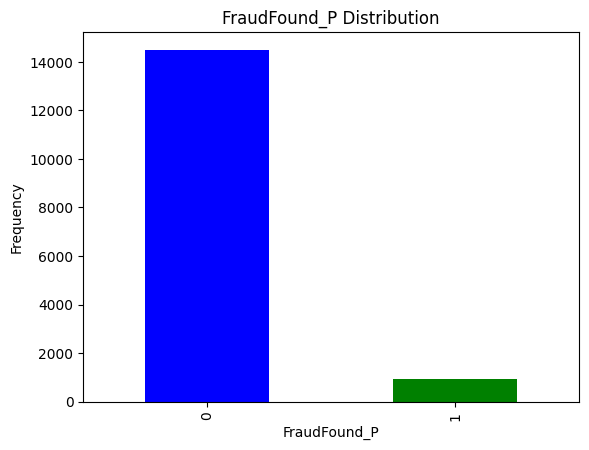

In [108]:
plt.figsize = (5, 5)
df['FraudFound_P'].value_counts().plot(kind='bar', color=['blue', 'green'])
plt.xlabel('FraudFound_P')
plt.ylabel('Frequency')
plt.title('FraudFound_P Distribution')
plt.show()

#### The target variable is highly imbalanced
*   1 → Fraudulent claim are low (Minority Class)
*   0 → Genuine claim are high (Majority Class)

#### Age vs Fraud Analysis

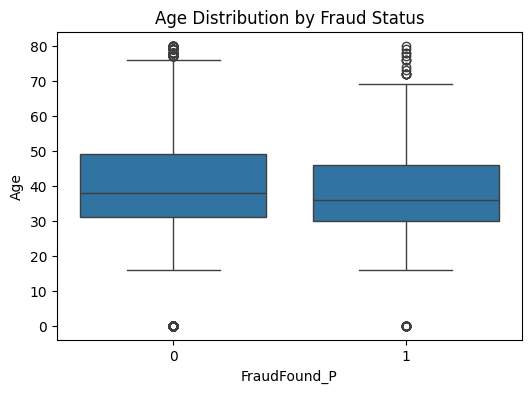

In [109]:
plt.figure(figsize=(6,4))
sns.boxplot(x='FraudFound_P', y='Age', data=df_fe)
plt.title("Age Distribution by Fraud Status")
plt.show()


#### Week of Accident vs Fraud

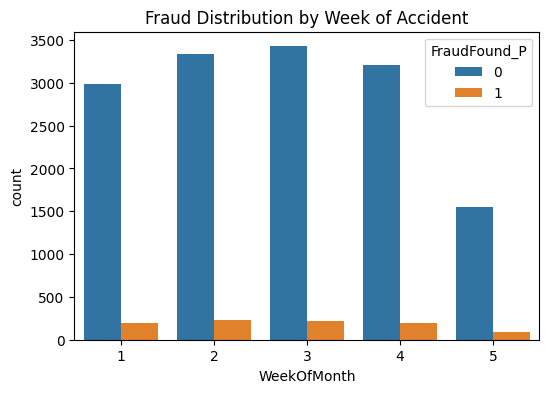

In [110]:
plt.figure(figsize=(6,4))
sns.countplot(x='WeekOfMonth', hue='FraudFound_P', data=df_fe)
plt.title("Fraud Distribution by Week of Accident")
plt.show()

#### Accident vs Claim Week Difference

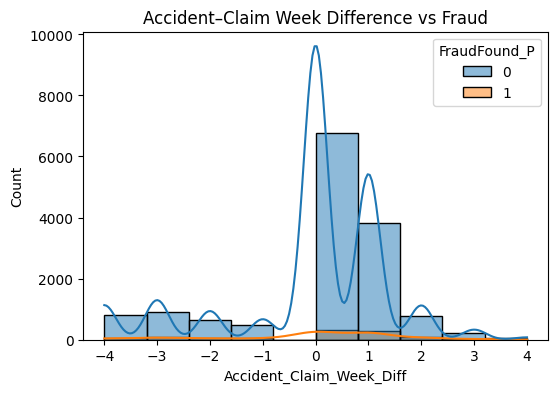

In [111]:
plt.figure(figsize=(6,4))
sns.histplot(
    data=df_fe,
    x='Accident_Claim_Week_Diff',
    hue='FraudFound_P',
    bins=10,
    kde=True
)
plt.title("Accident–Claim Week Difference vs Fraud")
plt.show()

#### **Insight**

*   Fraudulent claims show greater variability and abnormal delays between accident and claim dates, validating the engineered temporal inconsistency features.

#### Past Claims vs Fraud

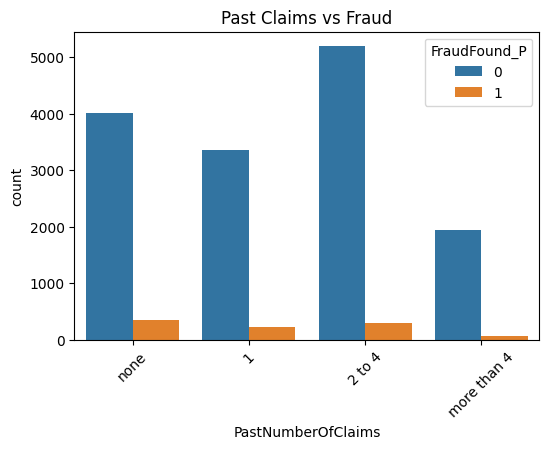

In [112]:
plt.figure(figsize=(6,4))
sns.countplot(
    x='PastNumberOfClaims',
    hue='FraudFound_P',
    data=df_fe
)
plt.xticks(rotation=45)
plt.title("Past Claims vs Fraud")
plt.show()

#### Supplements vs Fraud

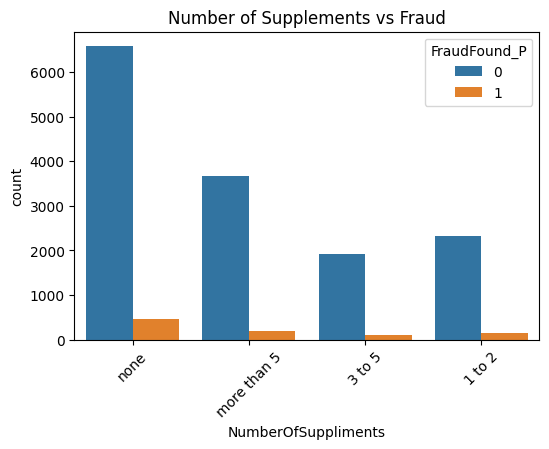

In [113]:
plt.figure(figsize=(6,4))
sns.countplot(
    x='NumberOfSuppliments',
    hue='FraudFound_P',
    data=df_fe
)
plt.xticks(rotation=45)
plt.title("Number of Supplements vs Fraud")
plt.show()



#### **Interpretation**

*   Fraud likelihood increases with the number of past claims and claim supplements, indicating claim inflation behavior, which is a known fraud indicator.

#### Days Policy vs Accident

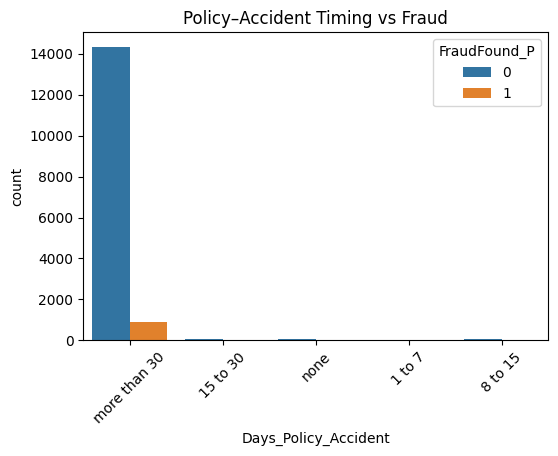

In [114]:

plt.figure(figsize=(6,4))
sns.countplot(
    x='Days_Policy_Accident',
    hue='FraudFound_P',
    data=df_fe
)
plt.xticks(rotation=45)
plt.title("Policy–Accident Timing vs Fraud")
plt.show()

#### Days Policy vs Claim

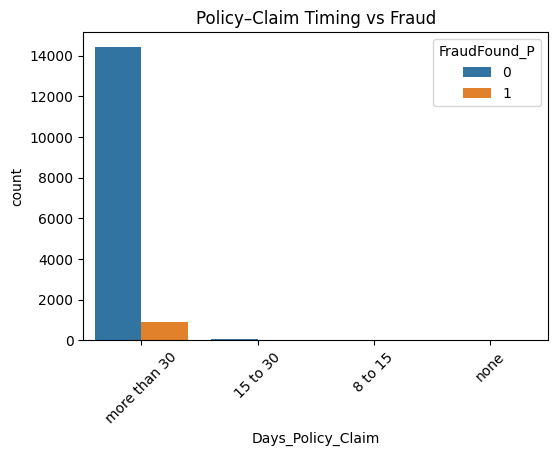

In [115]:

plt.figure(figsize=(6,4))
sns.countplot(
    x='Days_Policy_Claim',
    hue='FraudFound_P',
    data=df_fe
)
plt.xticks(rotation=45)
plt.title("Policy–Claim Timing vs Fraud")
plt.show()



#### **Insight**

*   Fraudulent claims are more frequent shortly after policy inception, reinforcing the relevance of policy timing risk features.

#### Vehicle Price

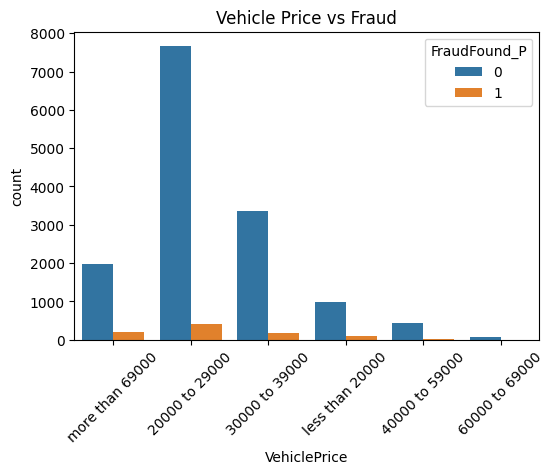

In [116]:

plt.figure(figsize=(6,4))
sns.countplot(
    x='VehiclePrice',
    hue='FraudFound_P',
    data=df_fe
)
plt.xticks(rotation=45)
plt.title("Vehicle Price vs Fraud")
plt.show()

#### Age of Vehicle

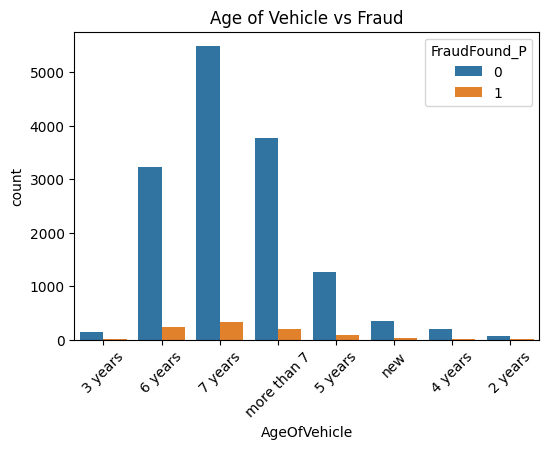

In [117]:

plt.figure(figsize=(6,4))
sns.countplot(
    x='AgeOfVehicle',
    hue='FraudFound_P',
    data=df_fe
)
plt.xticks(rotation=45)
plt.title("Age of Vehicle vs Fraud")
plt.show()

#### **Interpretation**

*   Fraud cases are more common in older and higher-valued vehicles, likely due to higher potential compensation.

#### Fault Attribution

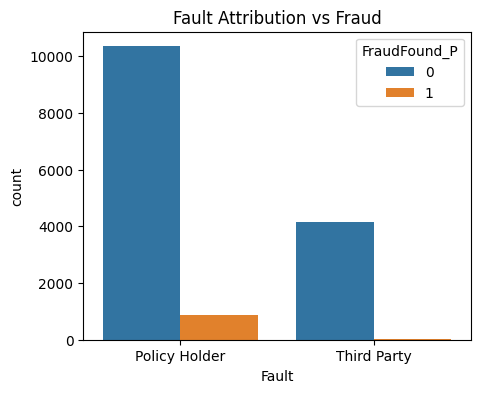

In [118]:
plt.figure(figsize=(5,4))
sns.countplot(
    x='Fault',
    hue='FraudFound_P',
    data=df_fe
)
plt.title("Fault Attribution vs Fraud")
plt.show()






#### Accident Area

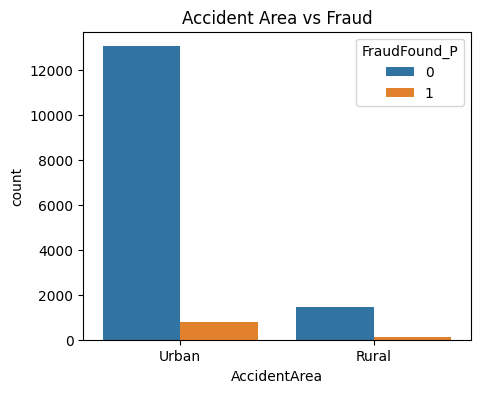

In [119]:
plt.figure(figsize=(5,4))
sns.countplot(
    x='AccidentArea',
    hue='FraudFound_P',
    data=df_fe
)
plt.title("Accident Area vs Fraud")
plt.show()

#### **Interpretation**

*   Fraud patterns differ based on fault assignment and accident location, supporting their inclusion in predictive modeling.

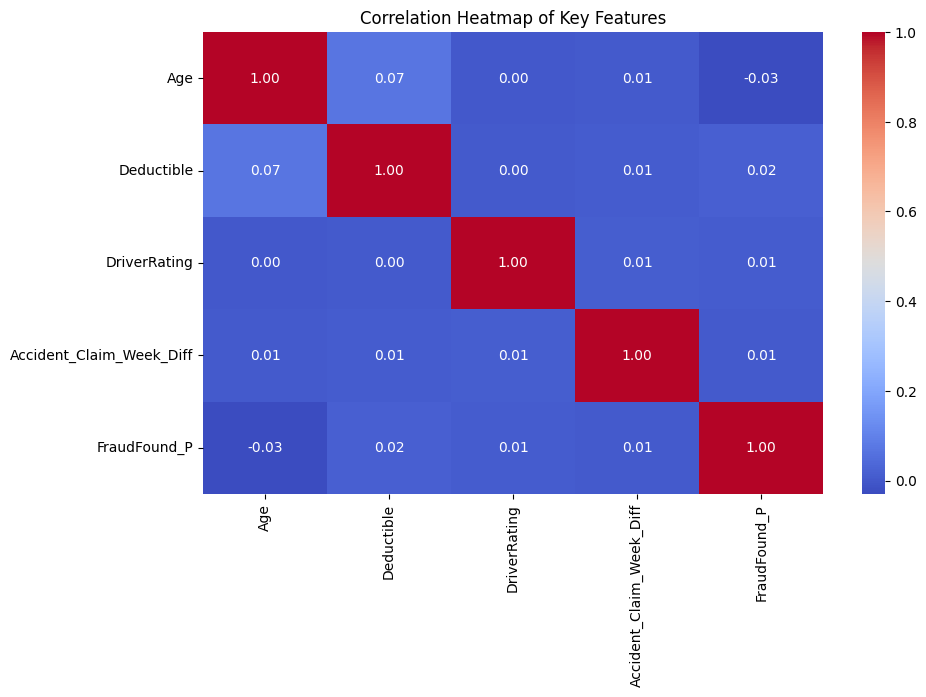

In [120]:
corr_features = [
    'Age',
    'Deductible',
    'DriverRating',
    'Accident_Claim_Week_Diff',
    'FraudFound_P'
]

plt.figure(figsize=(10,6))
sns.heatmap(
    df_fe[corr_features].corr(),
    annot=True,
    cmap='coolwarm',
    fmt=".2f"
)
plt.title("Correlation Heatmap of Key Features")
plt.show()


#### **EDA Summary**


*   Exploratory Data Analysis revealed strong class imbalance, behavioral fraud patterns, and temporal inconsistencies between accident and claim reporting. Fraudulent claims were more frequent among policyholders with prior claims, multiple supplements, delayed reporting, older vehicles, and missing legitimacy indicators such as police reports or witnesses. These insights informed feature engineering, model selection.



In [121]:
categorical_cols = df_fe.select_dtypes(include=['object']).columns
categorical_cols

Index(['Month', 'DayOfWeek', 'Make', 'AccidentArea', 'DayOfWeekClaimed',
       'MonthClaimed', 'Sex', 'MaritalStatus', 'Fault', 'PolicyType',
       'VehicleCategory', 'VehiclePrice', 'Days_Policy_Accident',
       'Days_Policy_Claim', 'PastNumberOfClaims', 'AgeOfVehicle',
       'AgeOfPolicyHolder', 'PoliceReportFiled', 'WitnessPresent', 'AgentType',
       'NumberOfSuppliments', 'AddressChange_Claim', 'NumberOfCars',
       'BasePolicy'],
      dtype='object')

In [122]:
numerical_cols = df_fe.select_dtypes(include=['int64', 'float64']).columns
numerical_cols
#

Index(['WeekOfMonth', 'WeekOfMonthClaimed', 'Age', 'FraudFound_P',
       'Deductible', 'DriverRating', 'Year', 'Accident_Claim_Week_Diff',
       'Same_Day_Accident_Claim', 'Same_Month_Accident_Claim',
       'Days_Policy_Accident_Risk', 'PolicyHolder_Age_Risk', 'At_Fault'],
      dtype='object')

### **Encode Categorical Features**

In [123]:
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df_fe[col] = le.fit_transform(df_fe[col])
    label_encoders[col] = le

joblib.dump(label_encoders, "label_encoders.pkl") ### For deployment


['label_encoders.pkl']



*   Label encoding was applied to nominal categorical variables to convert them into numerical representations compatible with tree-based models. Since Decision Trees and ensemble methods do not assume linear relationships between encoded values, label encoding does not introduce bias. Ordinal categorical variables were first transformed into risk-based numerical features to preserve domain ordering before dropping the original categorical representations.



In [124]:
df_fe.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15420 entries, 0 to 15419
Data columns (total 37 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Month                      15420 non-null  int64  
 1   WeekOfMonth                15420 non-null  int64  
 2   DayOfWeek                  15420 non-null  int64  
 3   Make                       15420 non-null  int64  
 4   AccidentArea               15420 non-null  int64  
 5   DayOfWeekClaimed           15420 non-null  int64  
 6   MonthClaimed               15420 non-null  int64  
 7   WeekOfMonthClaimed         15420 non-null  int64  
 8   Sex                        15420 non-null  int64  
 9   MaritalStatus              15420 non-null  int64  
 10  Age                        15420 non-null  int64  
 11  Fault                      15420 non-null  int64  
 12  PolicyType                 15420 non-null  int64  
 13  VehicleCategory            15420 non-null  int

#### Target Feature Selection

In [125]:
df2 = df_fe.copy()

In [126]:
target_col = 'FraudFound_P'
X = df2.drop(columns=[target_col]).copy()
y = df2[target_col].copy()

### **Preprocessig Pipeline before Modeling**

In [127]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn import preprocessing
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Redefine numerical and categorical columns based on X
current_numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns
current_categorical_cols = X.select_dtypes(include='object').columns

numeric_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
])

categorical_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
])

preprocessing_pipeline = ColumnTransformer([
    ('num', numeric_transformer, current_numerical_cols),
    ('cat', categorical_transformer, current_categorical_cols)
])

# Fit and transform
X_processed = preprocessing_pipeline.fit_transform(X)

# Convert to DataFrame then Clean
final_columns = list(current_numerical_cols) + list(current_categorical_cols)
X_processed = pd.DataFrame(X_processed, columns=final_columns, index=X.index)
X_processed = X_processed.apply(pd.to_numeric, errors='coerce')
X_processed = X_processed.replace([np.inf, -np.inf], np.nan).dropna()
y = y.loc[X_processed.index]

### **Feature Selection using Stepwise method**

In [128]:
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder

def stepwise_selection(X, y, threshold_in=0.05, threshold_out=0.05, verbose=True):
    """
    Perform forward-backward feature selection based on AIC and p-values.
    Prints complete model statistics at each step including Coef, Std.Err, t, P>|t|, [0.025, 0.975].
    """
    X = np.asarray(X, dtype=float)
    y = np.asarray(y, dtype=float)
    included = []
    step = 0

    if verbose:
        print("=== Stepwise Selection (AIC & Statistical Summary) ===\n")

    while True:
        changed = False
        excluded = list(set(range(X.shape[1])) - set(included))
        aic_with_candidates = {}

        # --- Forward Step ---
        for new_idx in excluded:
            model = sm.OLS(y, sm.add_constant(X[:, included + [new_idx]])).fit()
            aic_with_candidates[new_idx] = model.aic

        if not aic_with_candidates:
            break

        best_idx = min(aic_with_candidates, key=aic_with_candidates.get)
        model = sm.OLS(y, sm.add_constant(X[:, included + [best_idx]])).fit()
        best_pvalue = model.pvalues[-1]

        if best_pvalue < threshold_in:
            included.append(best_idx)
            changed = True
            step += 1
            if verbose:
                print(f"\n Step {step}: ADD '{X_processed.columns[best_idx]}'")
                summary_table = model.summary2().tables[1][['Coef.', 'Std.Err.', 't', 'P>|t|', '[0.025', '0.975]']]
                print(summary_table)
                print(f"AIC: {model.aic:.3f}")

        # --- Backward Step ---
        if included:
            model = sm.OLS(y, sm.add_constant(X[:, included])).fit()
            pvalues = model.pvalues[1:]  # exclude intercept
            if pvalues.max() > threshold_out:
                worst_idx = included[np.argmax(pvalues)]
                removed_feature = X_processed.columns[worst_idx]
                included.remove(worst_idx)
                changed = True
                step += 1
                if verbose:
                    print(f"\n Step {step}: REMOVE '{removed_feature}' (p={pvalues.max():.4f})")
                    summary_table = model.summary2().tables[1][['Coef.', 'Std.Err.', 't', 'P>|t|', '[0.025', '0.975]']]
                    print(summary_table)
                    print(f"AIC: {model.aic:.3f}")

        if not changed:
            break

    # --- Final Model ---
    final_model = sm.OLS(y, sm.add_constant(X[:, included])).fit()
    if verbose:
        print("\n=== Final Model Summary ===")
        summary_table = final_model.summary2().tables[1][['Coef.', 'Std.Err.', 't', 'P>|t|', '[0.025', '0.975]']]
        print(summary_table)
        print(f"Final AIC: {final_model.aic:.3f}\n")

    # Return both selected features and the final model for later use
    return [X_processed.columns[i] for i in included], final_model


# --- Stepwise Selection Execution ---
y_encoded = pd.Series(LabelEncoder().fit_transform(y), index=y.index)
stepwise_features, final_model = stepwise_selection(X_processed, y_encoded)

print("\n Selected Features:", stepwise_features)


=== Stepwise Selection (AIC & Statistical Summary) ===


 Step 1: ADD 'BasePolicy'
          Coef.  Std.Err.          t          P>|t|    [0.025    0.975]
const  0.109218  0.003132  34.876928  1.379196e-256  0.103079  0.115356
x1    -0.047630  0.002412 -19.749598   9.263118e-86 -0.052358 -0.042903
AIC: -992.462

 Step 2: ADD 'Fault'
          Coef.  Std.Err.          t          P>|t|    [0.025    0.975]
const  0.144523  0.003507  41.209450   0.000000e+00  0.137649  0.151397
x1    -0.057963  0.002427 -23.884939  7.718967e-124 -0.062719 -0.053206
x2    -0.090526  0.004268 -21.211528   1.898132e-98 -0.098891 -0.082161
AIC: -1434.037

 Step 3: ADD 'AgeOfPolicyHolder'
          Coef.  Std.Err.          t          P>|t|    [0.025    0.975]
const  0.179753  0.007533  23.862443  1.297247e-123  0.164988  0.194518
x1    -0.058692  0.002429 -24.167349  1.102490e-126 -0.063452 -0.053931
x2    -0.090566  0.004264 -21.239476   1.065493e-98 -0.098924 -0.082208
x3    -0.007045  0.001333  -5.283177   1

In [129]:
print("Selected Features:")
print(stepwise_features)

Selected Features:
['BasePolicy', 'Fault', 'AgeOfPolicyHolder', 'AddressChange_Claim', 'Same_Day_Accident_Claim', 'VehiclePrice', 'AccidentArea', 'AgeOfVehicle', 'Sex', 'VehicleCategory', 'PolicyType', 'Year', 'Deductible', 'PoliceReportFiled', 'Make']


### **Apply Standard Scaler to the selected features**

In [130]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
X_final = X_processed[stepwise_features]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_final)
X_scaled_df = pd.DataFrame(X_scaled, columns=stepwise_features)

### **Compute VIF on scaled features**

In [131]:
vif_data = pd.DataFrame()
vif_data["Feature"] = X_scaled_df.columns
vif_data["VIF"] = [
    variance_inflation_factor(X_scaled_df.values, i)
    for i in range(X_scaled_df.shape[1])
]

print(vif_data)

                    Feature       VIF
0                BasePolicy  1.976683
1                     Fault  1.053586
2         AgeOfPolicyHolder  1.262044
3       AddressChange_Claim  1.024291
4   Same_Day_Accident_Claim  1.019829
5              VehiclePrice  1.289845
6              AccidentArea  1.005881
7              AgeOfVehicle  1.321992
8                       Sex  1.056147
9           VehicleCategory  4.940743
10               PolicyType  4.143125
11                     Year  1.002389
12               Deductible  1.034599
13        PoliceReportFiled  1.003737
14                     Make  1.045952


#### **Interpretation**
*   The selected features shows no multicollinearity between them hence can be used as independent variables to train the base models.

#### **Now use the scaled features for modeling**

In [132]:
X_final_scaled = X_scaled_df
y_final_scaled = y_encoded

#### **Save the Scaler  Deployment**

In [133]:
import pickle
with open("scaler_stepwise_features.pkl", "wb") as f:
    pickle.dump(scaler, f)

In [134]:
pip install catboost

#### **Apply SMOTE to handle Class Imbalance**

In [135]:
from sklearn.model_selection import train_test_split, StratifiedKFold, RandomizedSearchCV
from sklearn.metrics import (
    roc_auc_score, average_precision_score, f1_score,
    precision_score, recall_score, accuracy_score
)
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier


smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_final_scaled, y_final_scaled)

print("Class balance after SMOTE:")
print(pd.Series(y_resampled).value_counts())

Class balance after SMOTE:
0    14497
1    14497
Name: count, dtype: int64


#### **Train test split**

In [136]:
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled,
    test_size=0.2,
    random_state=42,
    stratify=y_resampled
)

### **Evaluation utilities threshold tuning function**

In [137]:
def evaluate_by_threshold(y_true, probs, thresholds=np.linspace(0.01, 0.99, 99)):
    best_f1 = -1
    best_t = 0.5
    for t in thresholds:
        preds = (probs >= t).astype(int)
        f1 = f1_score(y_true, preds)
        if f1 > best_f1:
            best_f1, best_t = f1, t
    preds_best = (probs >= best_t).astype(int)
    return {
        "best_f1": best_f1,
        "best_threshold": best_t,
        "precision": precision_score(y_true, preds_best),
        "recall": recall_score(y_true, preds_best),
        "accuracy": accuracy_score(y_true, preds_best),
        "f1": f1_score(y_true, preds_best)
    }

def evaluate_all(y_true, probs):
    auc = roc_auc_score(y_true, probs)
    pr_auc = average_precision_score(y_true, probs)
    thr_res = evaluate_by_threshold(y_true, probs)
    return {
        "auc": auc,
        "pr_auc": pr_auc,
        **thr_res
    }

def record_result(results_list, model_name, stage, metrics, model_obj=None): # Added model_obj parameter
    row = {"model_name": model_name, "stage": stage} # Store model name separately
    if model_obj is not None:
        row["model_object"] = model_obj # Store model object if provided
    row.update(metrics)
    results_list.append(row)

def get_proba(clf, X):
    if hasattr(clf, "predict_proba"):
        return clf.predict_proba(X)[:, 1]
    elif hasattr(clf, "decision_function"):
        df = clf.decision_function(X)
        return 1 / (1 + np.exp(-df))  # sigmoid
    else:
        return clf.predict(X)

#### **Define Base Models**

In [138]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier


In [139]:
models = {
    "Decision Tree": DecisionTreeClassifier(
        criterion='gini',
        max_depth=6,
        min_samples_split=20,
        min_samples_leaf=10,
        class_weight='balanced',
        random_state=42
    ),

    "Logistic Regression": LogisticRegression(
        penalty='l2', max_iter=500, random_state=42, class_weight='balanced'
    ),

    "LightGBM": LGBMClassifier(
        boosting_type="gbdt", num_leaves=29, max_depth=-2,
        learning_rate=0.01, n_estimators=700,
        subsample=1.0, colsample_bytree=1.0,
        reg_alpha=0.0, reg_lambda=1.0, min_child_samples=18,
        objective="binary", random_state=42, n_jobs=-1,
        importance_type="split", verbose=-1
    ),

    "XGBoost": XGBClassifier(
        n_estimators=700, learning_rate=0.03, max_depth=4,
        reg_lambda=2, reg_alpha=1, gamma=0.3, subsample=0.8,
        colsample_bytree=0.8, eval_metric='logloss',
        random_state=42, use_label_encoder=False
    ),

    "Neural Network (MLP)": MLPClassifier(
        hidden_layer_sizes=(64, 32),
        activation='relu',
        solver='adam',
        alpha=0.0005,
        learning_rate='adaptive',
        max_iter=500,
        random_state=42
    )
}


### **Hyperparameter search spaces**

In [140]:
param_spaces_light = {
    "Decision Tree": {
        "criterion": ["gini", "entropy"],
        "max_depth": [None, 6, 10],
        "min_samples_split": [2, 10],
        "min_samples_leaf": [1, 5],
        "class_weight": [None, "balanced"]
    },

    "Logistic Regression": {
        "C": [0.01, 0.1, 1, 10],
        "penalty": ["l1", "l2"],
        "solver": ["saga"]
    },

    "LightGBM": {
        "num_leaves": [31, 63],
        "max_depth": [-1, 8],
        "learning_rate": [0.01, 0.05],
        "n_estimators": [300, 600],
        "min_child_samples": [10, 20],
        "subsample": [0.8, 1.0],
        "colsample_bytree": [0.8, 1.0]
    },

    "XGBoost": {
        "n_estimators": [300, 600],
        "learning_rate": [0.01, 0.05],
        "max_depth": [4, 6],
        "min_child_weight": [1, 5],
        "subsample": [0.8, 1.0],
        "colsample_bytree": [0.8, 1.0]
    },

    "Neural Network (MLP)": {
        "hidden_layer_sizes": [(32,), (64,), (64, 32)],
        "activation": ["relu"],
        "solver": ["adam"],
        "alpha": [0.0001, 0.001],
        "learning_rate_init": [0.001, 0.01],
        "max_iter": [200, 300]
    }
}



#### **Training and tuning function**

In [145]:
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold

def train_and_tune(model_name, clf, param_space=None, n_iter=20):
    results = {}

    clf.fit(X_train, y_train)
    probs = get_proba(clf, X_test)
    baseline_metrics = evaluate_all(y_test, probs)
    results["baseline"] = {
        "model": clf,
        "metrics": baseline_metrics
    }

    if not param_space:
        return results

    cv = StratifiedKFold(
        n_splits=3,   # light CV
        shuffle=True,
        random_state=42
    )

    tuner = RandomizedSearchCV(
        estimator=clf,
        param_distributions=param_space,
        n_iter=n_iter,
        scoring="average_precision",
        cv=cv,
        verbose=1,
        n_jobs=-1,
        random_state=42
    )

    tuner.fit(X_train, y_train)

    tuned_clf = tuner.best_estimator_
    tuned_probs = get_proba(tuned_clf, X_test)
    tuned_metrics = evaluate_all(y_test, tuned_probs)

    results["tuned"] = {
        "model": tuned_clf,
        "metrics": tuned_metrics,
        "best_params": tuner.best_params_
    }

    return results


#### **Run training for all models**

In [146]:
results_list = []

for name, model in models.items():
    print(f"\nTraining {name}")

    params = param_spaces_light.get(name, None)

    res = train_and_tune(
        model_name=name,
        clf=model,
        param_space=params,
        n_iter=20
    )

    base_metrics = res["baseline"]["metrics"]
    record_result(
        results_list,
        name,
        "baseline",
        base_metrics,
        model_obj=res["baseline"]["model"]
    )

    if "tuned" in res:
        tuned_metrics = res["tuned"]["metrics"]
        best_params = res["tuned"]["best_params"]

        record_result(
            results_list,
            name,
            "tuned",
            tuned_metrics,
            model_obj=res["tuned"]["model"]
        )

        print(f"{name} tuning complete. Best params: {best_params}")



Training Decision Tree
Fitting 3 folds for each of 20 candidates, totalling 60 fits
Decision Tree tuning complete. Best params: {'min_samples_split': 10, 'min_samples_leaf': 5, 'max_depth': None, 'criterion': 'gini', 'class_weight': 'balanced'}

Training Logistic Regression


/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 8 is smaller than n_iter=20. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 3 folds for each of 8 candidates, totalling 24 fits
Logistic Regression tuning complete. Best params: {'solver': 'saga', 'penalty': 'l2', 'C': 0.01}

Training LightGBM
Fitting 3 folds for each of 20 candidates, totalling 60 fits
LightGBM tuning complete. Best params: {'subsample': 0.8, 'num_leaves': 63, 'n_estimators': 300, 'min_child_samples': 10, 'max_depth': -1, 'learning_rate': 0.05, 'colsample_bytree': 1.0}

Training XGBoost


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [08:55:11] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Fitting 3 folds for each of 20 candidates, totalling 60 fits


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [08:55:58] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost tuning complete. Best params: {'subsample': 0.8, 'n_estimators': 600, 'min_child_weight': 1, 'max_depth': 6, 'learning_rate': 0.05, 'colsample_bytree': 1.0}

Training Neural Network (MLP)
Fitting 3 folds for each of 20 candidates, totalling 60 fits
Neural Network (MLP) tuning complete. Best params: {'solver': 'adam', 'max_iter': 300, 'learning_rate_init': 0.01, 'hidden_layer_sizes': (64, 32), 'alpha': 0.0001, 'activation': 'relu'}


#### **Compile Results**

In [147]:
results_df = pd.DataFrame(results_list)
cols = ["model_name", "stage", "auc", "pr_auc", "f1", "best_f1", "best_threshold", "precision", "recall", "accuracy"]
results_df = results_df[cols]

print("\nFinal Summary (single line):")
print(results_df.sort_values(["model_name", "stage"]).reset_index(drop=True).to_string(index=False))


Final Summary (single line):
          model_name    stage      auc   pr_auc       f1  best_f1  best_threshold  precision   recall  accuracy
       Decision Tree baseline 0.876399 0.834659 0.829195 0.829195            0.54   0.731978 0.956192  0.803069
       Decision Tree    tuned 0.972803 0.972680 0.932103 0.932103            0.46   0.940949 0.923422  0.932747
            LightGBM baseline 0.986819 0.988789 0.945403 0.945403            0.54   0.975771 0.916868  0.947060
            LightGBM    tuned 0.988942 0.990894 0.956948 0.956948            0.49   0.971226 0.943084  0.957579
 Logistic Regression baseline 0.802015 0.731253 0.803438 0.803438            0.28   0.687086 0.967230  0.763407
 Logistic Regression    tuned 0.803592 0.733416 0.802922 0.802922            0.30   0.686505 0.966885  0.762718
Neural Network (MLP) baseline 0.949042 0.929297 0.901178 0.901178            0.50   0.857143 0.949983  0.895844
Neural Network (MLP)    tuned 0.953464 0.936215 0.907961 0.907961         

#### **Explanation**


*   The results show that all models improved after hyperparameter tuning, with tree-based ensemble models performing best. LightGBM and XGBoost achieved the highest discriminative power (AUC > 0.987, PR-AUC > 0.989) and strong balance between precision and recall, making them highly effective for classification. Decision Tree and Neural Network also improved significantly after tuning, with the Decision Tree achieving high interpretability alongside solid performance (AUC = 0.9728, F1 = 0.9321). Logistic Regression showed minimal gains, indicating its limited capacity for capturing complex patterns in the data. Overall, LightGBM and XGBoost are the strongest candidates for deployment, while the Decision Tree offers a simpler, interpretable alternative.



#### **Identify the best Model**

In [148]:
import shap
import matplotlib.pyplot as plt
from sklearn.metrics import (
    roc_auc_score, average_precision_score, precision_score,
    recall_score, accuracy_score, f1_score, log_loss,
    confusion_matrix, roc_curve
)
from sklearn.inspection import permutation_importance

best_row = (
    results_df[results_df["stage"] == "tuned"]
    .sort_values(by="auc", ascending=False)
    .iloc[0]
)

best_model_name = best_row["model_name"] # Changed 'model' to 'model_name'
best_threshold = best_row["best_threshold"]


print(f"\n> Best Model Automatically Selected: {best_model_name} (Tuned)")
print(f">>> Best Threshold: {best_threshold:.4f}")


> Best Model Automatically Selected: LightGBM (Tuned)
>>> Best Threshold: 0.4900


#### **Explanation**


*   LightGBM is chosen as the best model because it achieves the highest overall performance, with superior AUC (0.9889), PR-AUC (0.9909), F1 score (0.9569), precision, and recall, effectively distinguishing between classes. Its combination of speed, accuracy, and robustness makes it ideal for deployment in real-world classification tasks.



####  **Model Diognostic**

In [149]:
results_df = pd.DataFrame(results_list)

best_row = (
    results_df[results_df["stage"] == "tuned"]
    .sort_values(by="auc", ascending=False)
    .iloc[0]
)

best_model_name = best_row["model_name"]
best_threshold = best_row["best_threshold"]

actual_best_model = None
for res_entry in results_list:
    # Look for the model_object associated with the best_model_name and 'tuned' stage
    if res_entry.get('model_name') == best_model_name and res_entry['stage'] == 'tuned':
        actual_best_model = res_entry.get('model_object')
        break

if actual_best_model is None:
    raise ValueError(f"Could not find the tuned model object for {best_model_name} in results_list.")

y_pred_proba = actual_best_model.predict_proba(X_test)[:, 1]
y_pred = (y_pred_proba >= best_threshold).astype(int)

metrics = {
    "Log Loss": log_loss(y_test, y_pred_proba),
    "ROC-AUC": roc_auc_score(y_test, y_pred_proba),
    "PR-AUC": average_precision_score(y_test, y_pred_proba),
    "Accuracy": accuracy_score(y_test, y_pred),
    "Precision": precision_score(y_test, y_pred),
    "Recall": recall_score(y_test, y_pred),
    "F1 Score": f1_score(y_test, y_pred),
}
for m, v in metrics.items():
    print(f"{m}: {v:.4f}")

Log Loss: 0.1231
ROC-AUC: 0.9889
PR-AUC: 0.9909
Accuracy: 0.9576
Precision: 0.9712
Recall: 0.9431
F1 Score: 0.9569


#### **Explanation**


*   These diagnostics indicate that LightGBM is highly reliable and robust, with excellent predictive accuracy, low false positives, and minimal missed cases. Its strong balance of precision, recall, and overall performance makes it well-suited for deployment in real-world applications.



#### **Plot the AUC-ROC Curve for the best model**

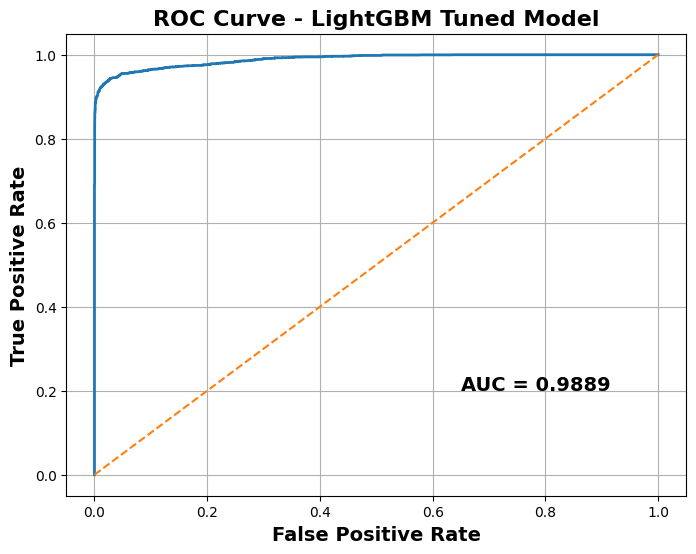

In [151]:
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
auc_score = metrics["ROC-AUC"]

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0, 1], [0, 1], linestyle="--")

plt.xlabel("False Positive Rate", fontsize=14, fontweight="bold")
plt.ylabel("True Positive Rate", fontsize=14, fontweight="bold")
plt.title("ROC Curve - LightGBM Tuned Model", fontsize=16, fontweight="bold")
plt.text(0.65, 0.2, f"AUC = {auc_score:.4f}", fontsize=14, fontweight="bold")

plt.grid(True)

plt.savefig("lightgbm_roc_curve.jpg", dpi=250, bbox_inches="tight")
plt.show()

#### **Plot the Important Features**

                    feature  importance
14                     Make        3882
2         AgeOfPolicyHolder        2953
7              AgeOfVehicle        2695
5              VehiclePrice        2252
11                     Year        1825
0                BasePolicy        1044
3       AddressChange_Claim         701
4   Same_Day_Accident_Claim         637
6              AccidentArea         541
8                       Sex         513
10               PolicyType         493
12               Deductible         340
9           VehicleCategory         310
13        PoliceReportFiled         213
1                     Fault         201


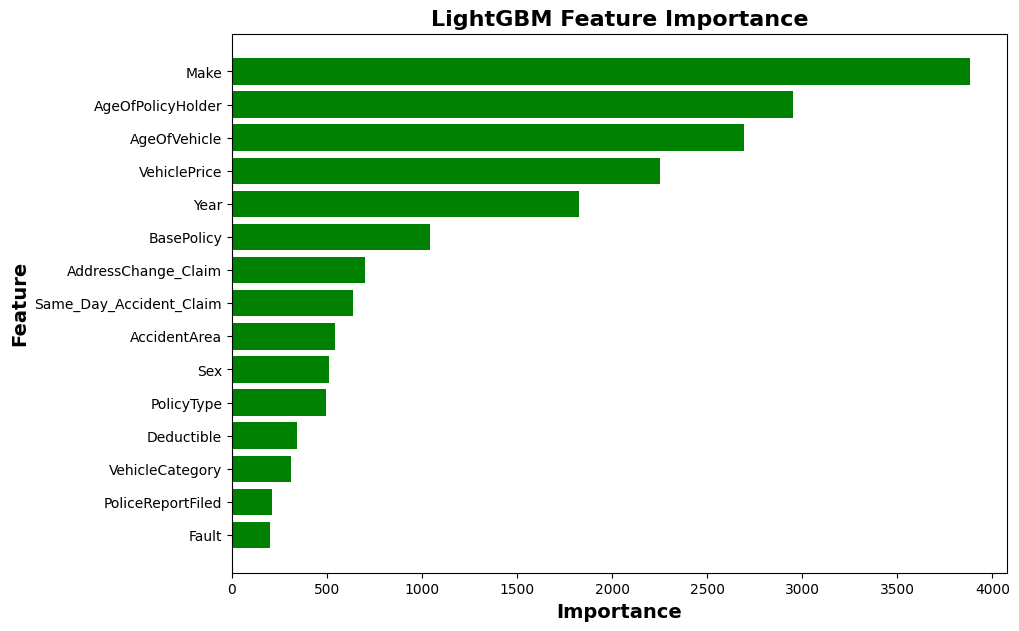

In [152]:
feature_names = X_final.columns.tolist()

feature_importance_values = actual_best_model.feature_importances_
feat_imp = pd.DataFrame({
    "feature": feature_names,
    "importance": feature_importance_values
}).sort_values("importance", ascending=False)

print(feat_imp.head(15))

plt.figure(figsize=(10, 7))
plt.barh(
    feat_imp["feature"].head(15),
    feat_imp["importance"].head(15),
    color="green"
)

plt.gca().invert_yaxis()
plt.xlabel("Importance", fontsize=14, fontweight="bold")
plt.ylabel("Feature", fontsize=14, fontweight="bold")
plt.title(f"{best_model_name} Feature Importance", fontsize=16, fontweight="bold")
plt.savefig(f"{best_model_name.lower().replace(' ', '_')}_feature_importance.jpg", dpi=250, bbox_inches="tight")
plt.show()

#### **Explanation**


*   The chart shows the relative influence of each feature on the LightGBM model’s predictions. **Make** of the vehicle is the most important feature, followed by **AgeOfPolicyHolder** and **AgeOfVehicle**, indicating that the vehicle type and the policyholder’s demographics strongly affect fraud prediction. Other features like VehiclePrice, Year, and BasePolicy also contribute, while features such as Fault and PoliceReportFiled have minimal impact. This helps identify which factors the model relies on most for decision-making and can guide further data collection or risk assessment.



#### **Confusion Matrix for the Model**

          Pred 0  Pred 1
Actual 0    2819      81
Actual 1     165    2734


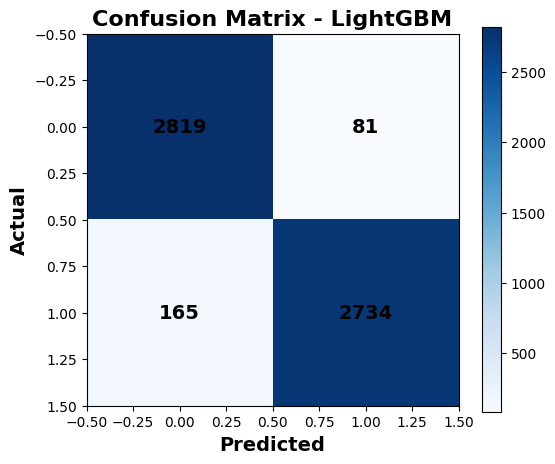

In [153]:
cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm, index=["Actual 0", "Actual 1"], columns=["Pred 0", "Pred 1"])

print(cm_df)

plt.figure(figsize=(6, 5))
plt.imshow(cm, cmap="Blues")

plt.title(f"Confusion Matrix - {best_model_name}", fontsize=16, fontweight="bold") # Dynamically set title
plt.xlabel("Predicted", fontsize=14, fontweight="bold")
plt.ylabel("Actual", fontsize=14, fontweight="bold")

for i in range(2):
    for j in range(2):
        plt.text(j, i, cm[i, j], ha="center", va="center", fontsize=14, fontweight="bold")

plt.colorbar()
plt.savefig(f"{best_model_name.lower().replace(' ', '_')}_confusion_matrix.jpg", dpi=250, bbox_inches="tight") # Dynamically set filename
plt.show()

#### **Explanation**


*   The confusion matrix shows that the model correctly classified most cases, with 2,819 true negatives and 2,734 true positives, while making relatively few errors (81 false positives and 165 false negatives). This indicates the model is highly accurate, with strong ability to detect both positive and negative cases, making it reliable for deployment.



#### **Extract the top 15 Features**

In [154]:
feature_names = X_final.columns.tolist()
feature_importance_values = actual_best_model.feature_importances_

feat_imp_df = pd.DataFrame({
    "feature": feature_names,
    "importance": feature_importance_values
}).sort_values("importance", ascending=False)

print("\nTop feature importance")
print(feat_imp_df.head(50))


Top feature importance
                    feature  importance
14                     Make        3882
2         AgeOfPolicyHolder        2953
7              AgeOfVehicle        2695
5              VehiclePrice        2252
11                     Year        1825
0                BasePolicy        1044
3       AddressChange_Claim         701
4   Same_Day_Accident_Claim         637
6              AccidentArea         541
8                       Sex         513
10               PolicyType         493
12               Deductible         340
9           VehicleCategory         310
13        PoliceReportFiled         213
1                     Fault         201


#### **Pickle save the top Features**

In [155]:
TOP_N = 15

top_features_list = feat_imp_df["feature"].head(TOP_N).tolist()

print(f"\nTop {TOP_N} features selected for deployment:")
print(top_features_list)

with open("top_features.pkl", "wb") as f:
    pickle.dump(top_features_list, f)

print("\n>>> Saved TOP features as 'top_features.pkl'")


Top 15 features selected for deployment:
['Make', 'AgeOfPolicyHolder', 'AgeOfVehicle', 'VehiclePrice', 'Year', 'BasePolicy', 'AddressChange_Claim', 'Same_Day_Accident_Claim', 'AccidentArea', 'Sex', 'PolicyType', 'Deductible', 'VehicleCategory', 'PoliceReportFiled', 'Fault']

>>> Saved TOP features as 'top_features.pkl'


#### **Save the Tuned Model as a Pickle for deployment**

In [156]:
model_filename = f"{best_model_name.lower().replace(' ', '_')}_tuned_model.pkl"

with open(model_filename, "wb") as f:
    pickle.dump(actual_best_model, f)

print(f">>> {best_model_name} tuned model saved as '{model_filename}'")

>>> LightGBM tuned model saved as 'lightgbm_tuned_model.pkl'
